<a href="https://colab.research.google.com/github/joshIsac/computervisionlab/blob/main/2348523_CAC2_computervision_CIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
# @title Import necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

1.	Illustrate correlation and convolution operation for the following kernels Using filter2D function
i)	Box Blur Kernel
ii)	Edge detection kernel


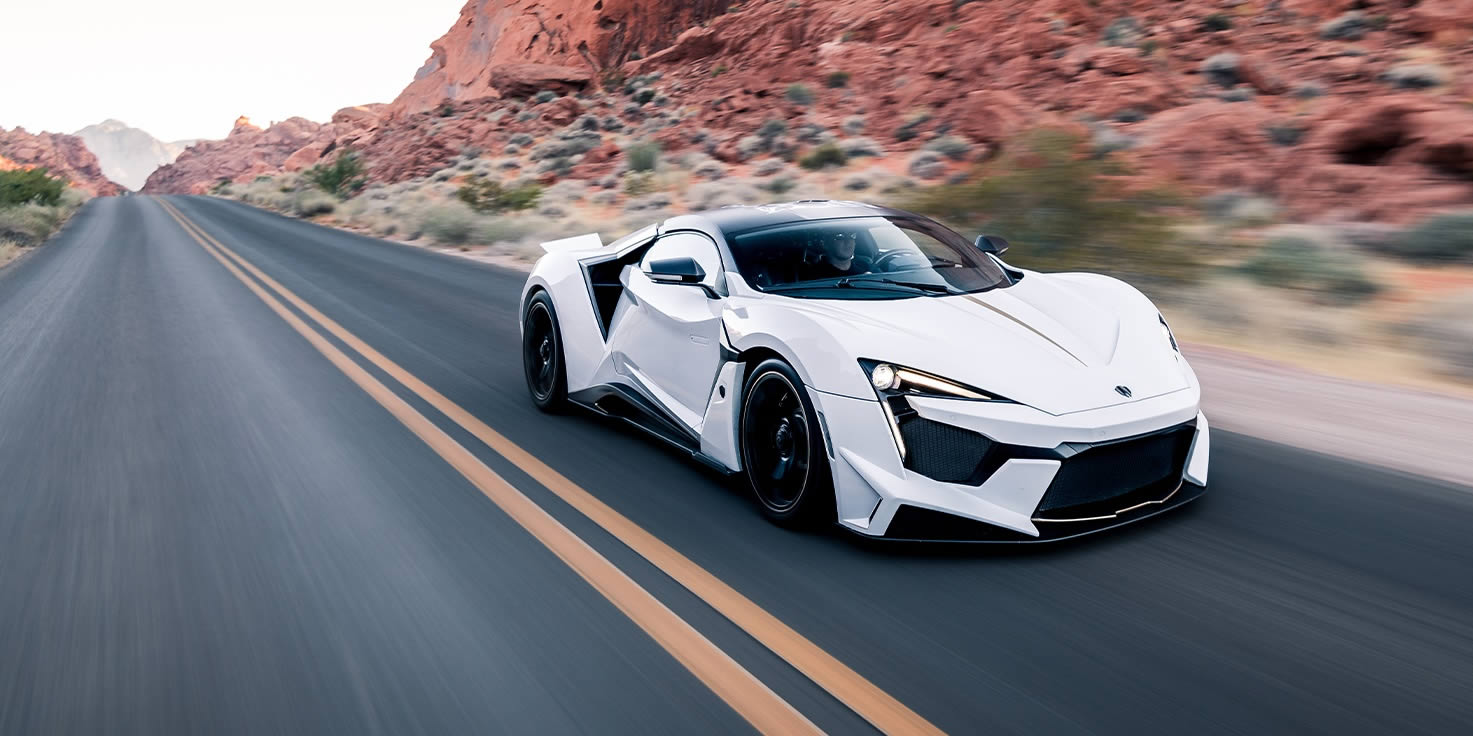

In [51]:
image_path="/content/drive/MyDrive/wmotors_fenyrsupersport_gallery_img_01.jpg"
img=cv2.imread(image_path)
cv2_imshow(img)

Reading the image using cv2.imread()


In [52]:
img.shape

(736, 1473, 3)

checking the shape of an image

the grayscale image is:


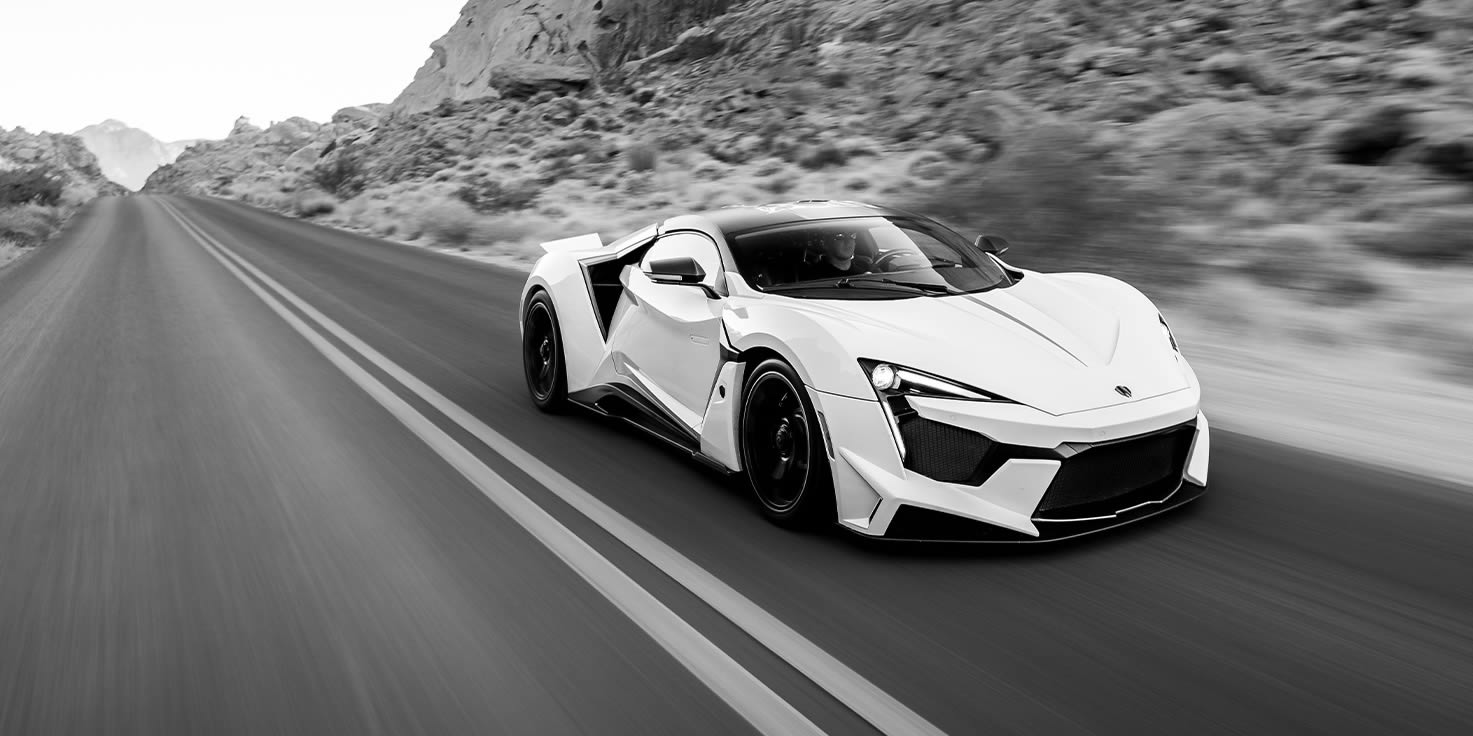

In [53]:
#convert the image to grayscale image
grayscale_img=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
print("the grayscale image is:")
cv2_imshow(grayscale_img)

In [54]:
#print the pixels of an img
print(img)

[[[249 251 252]
  [249 251 252]
  [249 251 252]
  ...
  [115 122 185]
  [114 121 184]
  [110 119 183]]

 [[249 251 252]
  [249 251 252]
  [249 251 252]
  ...
  [112 119 182]
  [110 117 180]
  [106 114 181]]

 [[249 251 252]
  [249 251 252]
  [249 251 252]
  ...
  [109 115 180]
  [107 113 178]
  [103 111 178]]

 ...

 [[ 94  82  70]
  [ 93  81  69]
  [ 92  80  68]
  ...
  [ 68  56  46]
  [ 68  56  46]
  [ 69  57  47]]

 [[ 94  82  70]
  [ 93  81  69]
  [ 92  80  68]
  ...
  [ 68  56  46]
  [ 68  56  46]
  [ 69  57  47]]

 [[ 94  82  70]
  [ 93  81  69]
  [ 92  80  68]
  ...
  [ 68  56  46]
  [ 68  56  46]
  [ 69  57  47]]]


In [55]:
#print the pixels of grayscaleimage
print(grayscale_img)

[[251 251 251 ... 140 139 137]
 [251 251 251 ... 137 135 133]
 [251 251 251 ... 134 132 130]
 ...
 [ 80  79  78 ...  54  54  55]
 [ 80  79  78 ...  54  54  55]
 [ 80  79  78 ...  54  54  55]]


boxblur of original image:


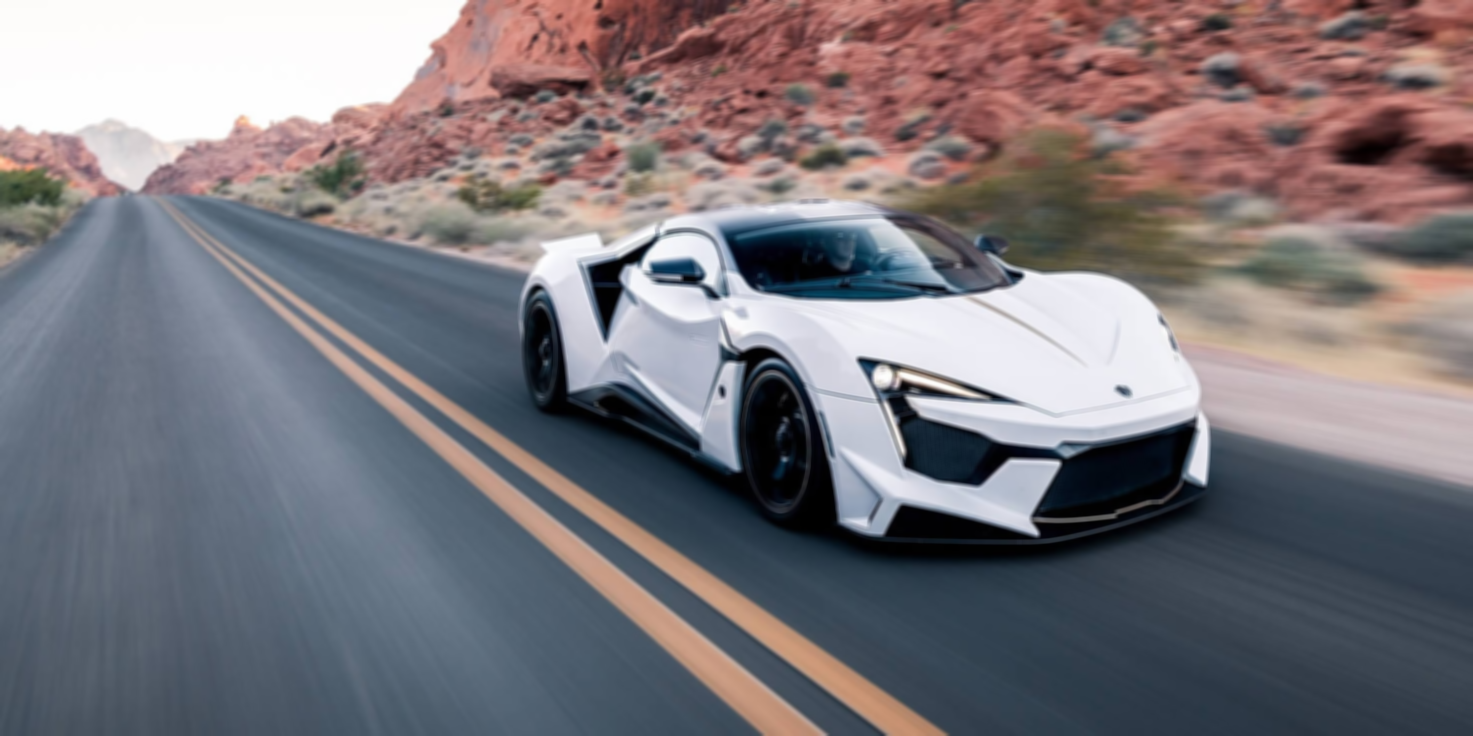

In [56]:
#implementation of box blur
kernel=np.ones((5,5),np.float32)/25
box_blur_img=cv2.filter2D(img,-1,kernel)
print("boxblur of original image:")
cv2_imshow(box_blur_img)

boxblur of grayscale image:


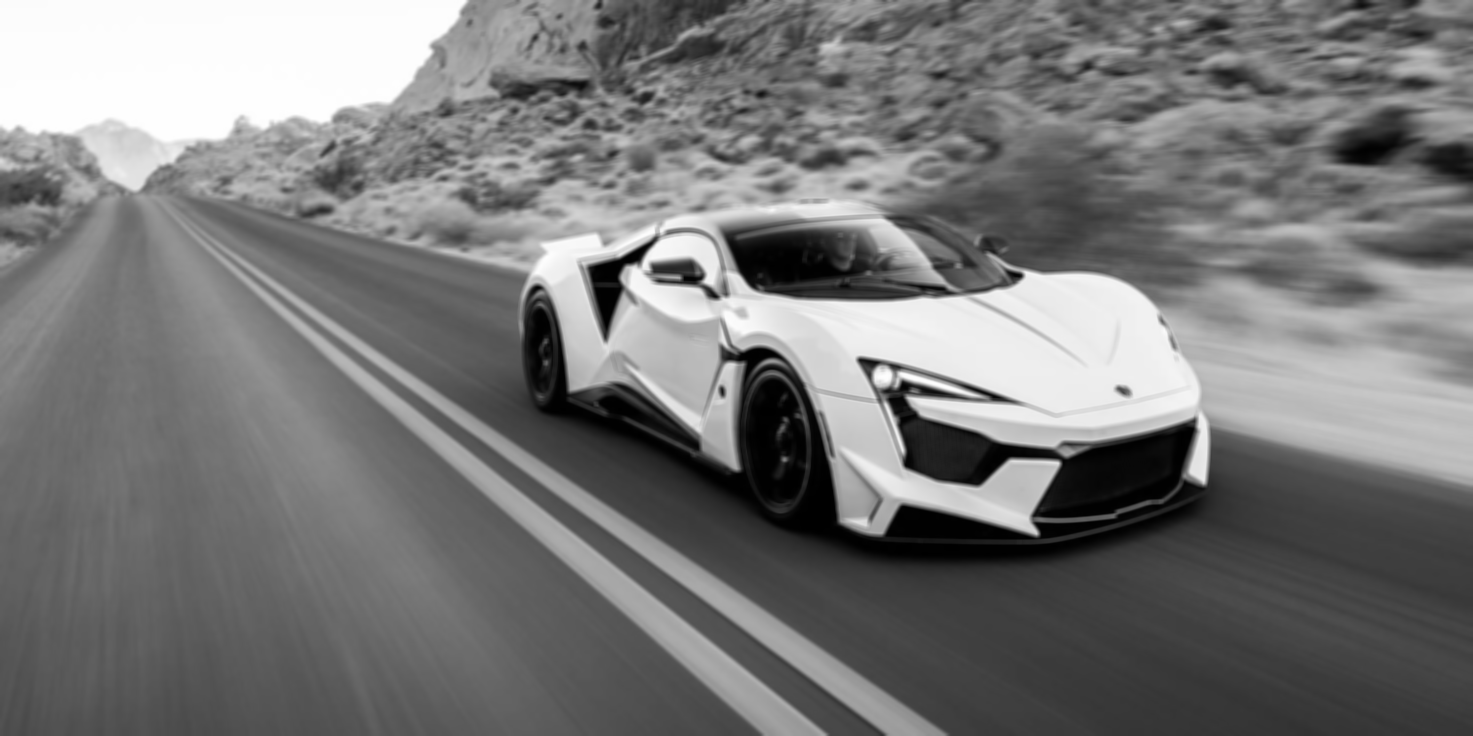

In [57]:
#implementation of box blur
kernel=np.ones((5,5),np.float32)/25
box_blur_img=cv2.filter2D(grayscale_img,-1,kernel)
print("boxblur of grayscale image:")
cv2_imshow(box_blur_img)

boxblur of original using user defined kernel image:


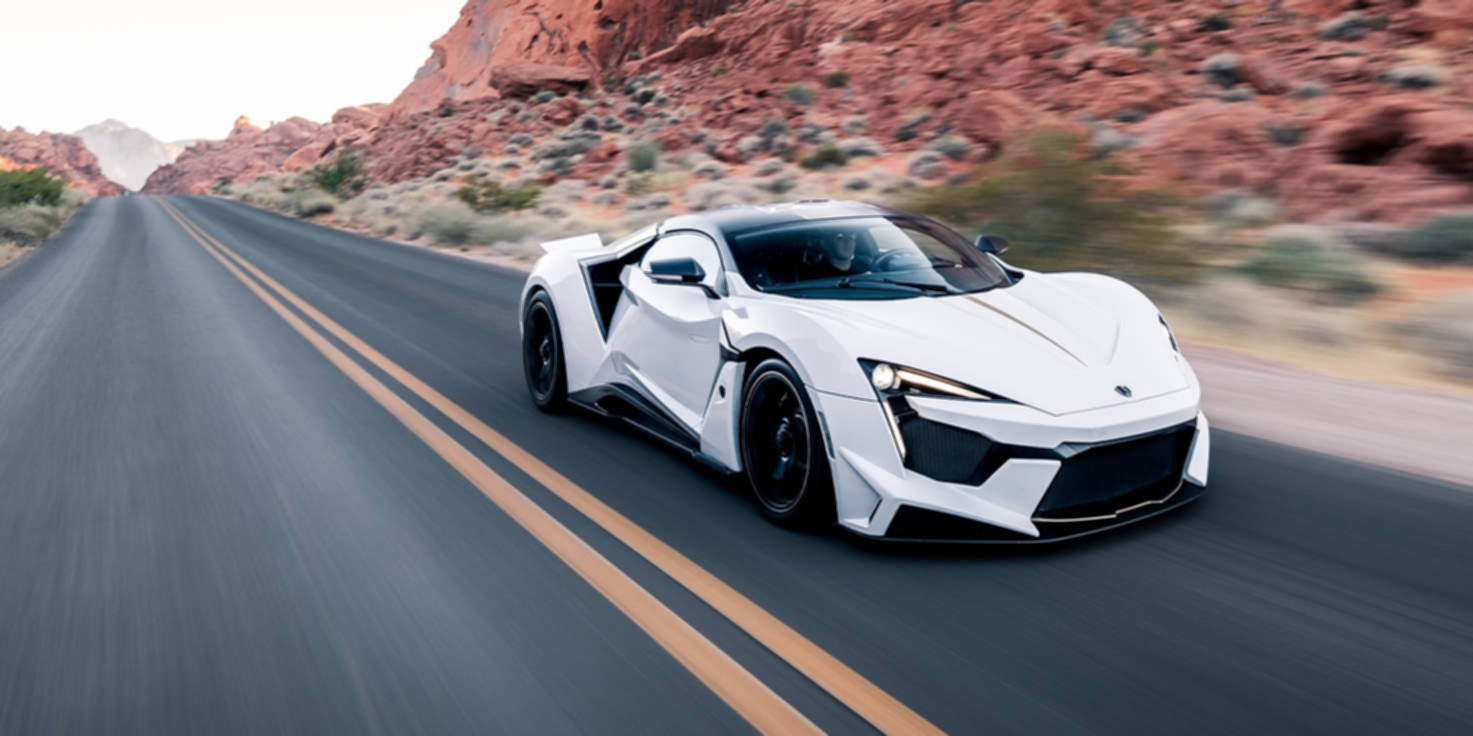

In [58]:
#userdefined
kernel=1/9*(np.array([[1,1,1],[1,1,1],[1,1,1]]))
box_blur_img=cv2.filter2D(img,-1,kernel)
print("boxblur of original using user defined kernel image:")
cv2_imshow(box_blur_img)

boxblur of grayscale image using user defined kernel :


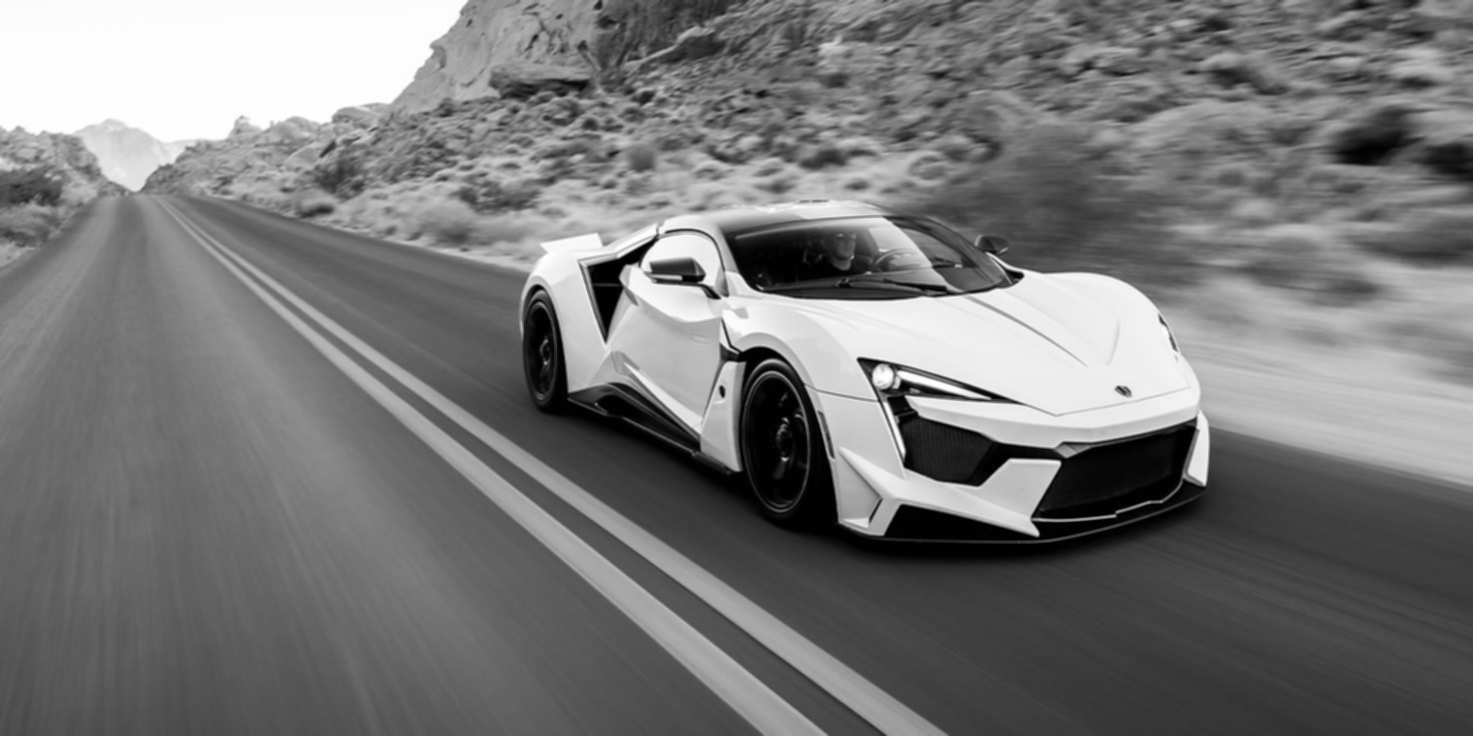

In [59]:
#userdefined
kernel=1/9*(np.array([[1,1,1],[1,1,1],[1,1,1]]))
box_blur_img=cv2.filter2D(grayscale_img,-1,kernel)
print("boxblur of grayscale image using user defined kernel :")
cv2_imshow(box_blur_img)

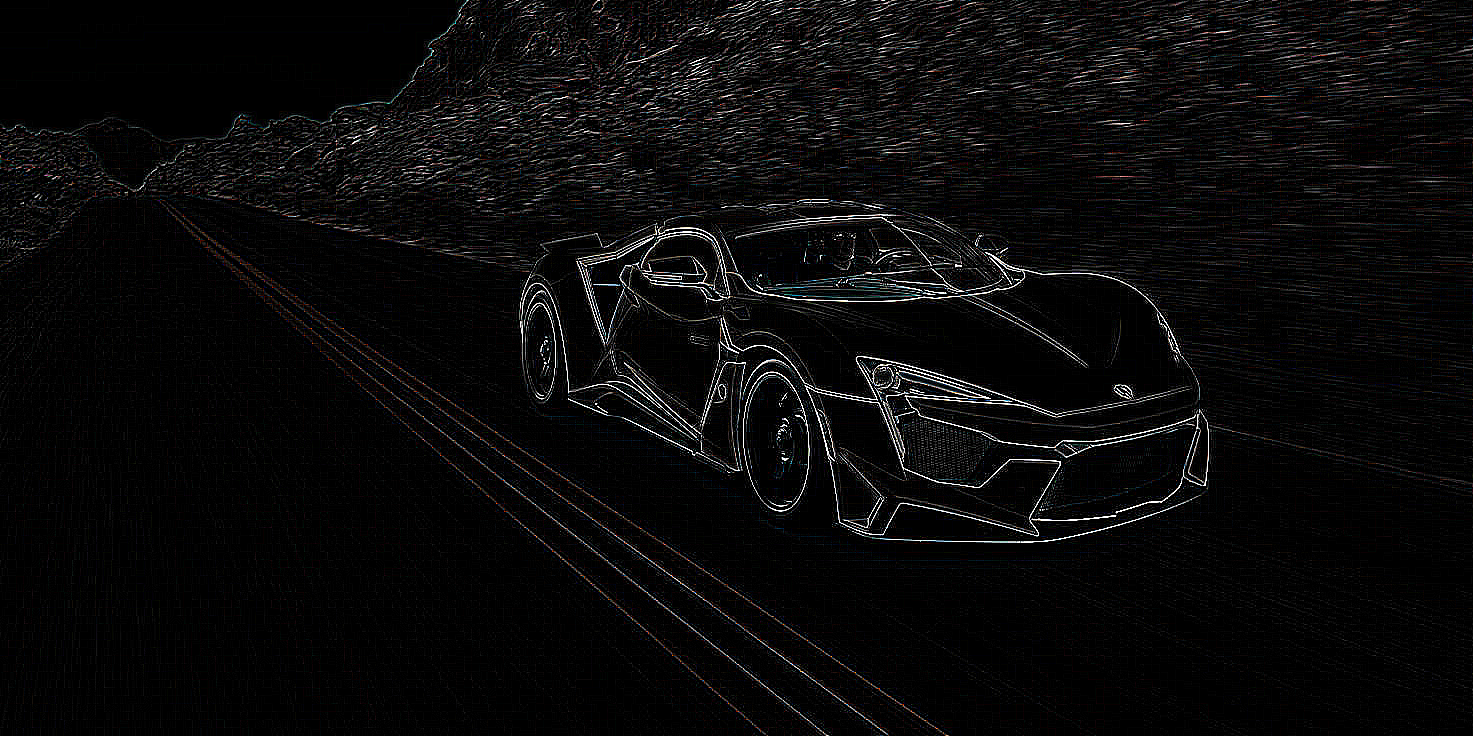

In [60]:
#edge detection kernel
kernel=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edge_detected_img=cv2.filter2D(img,-1,kernel)
cv2_imshow(edge_detected_img)

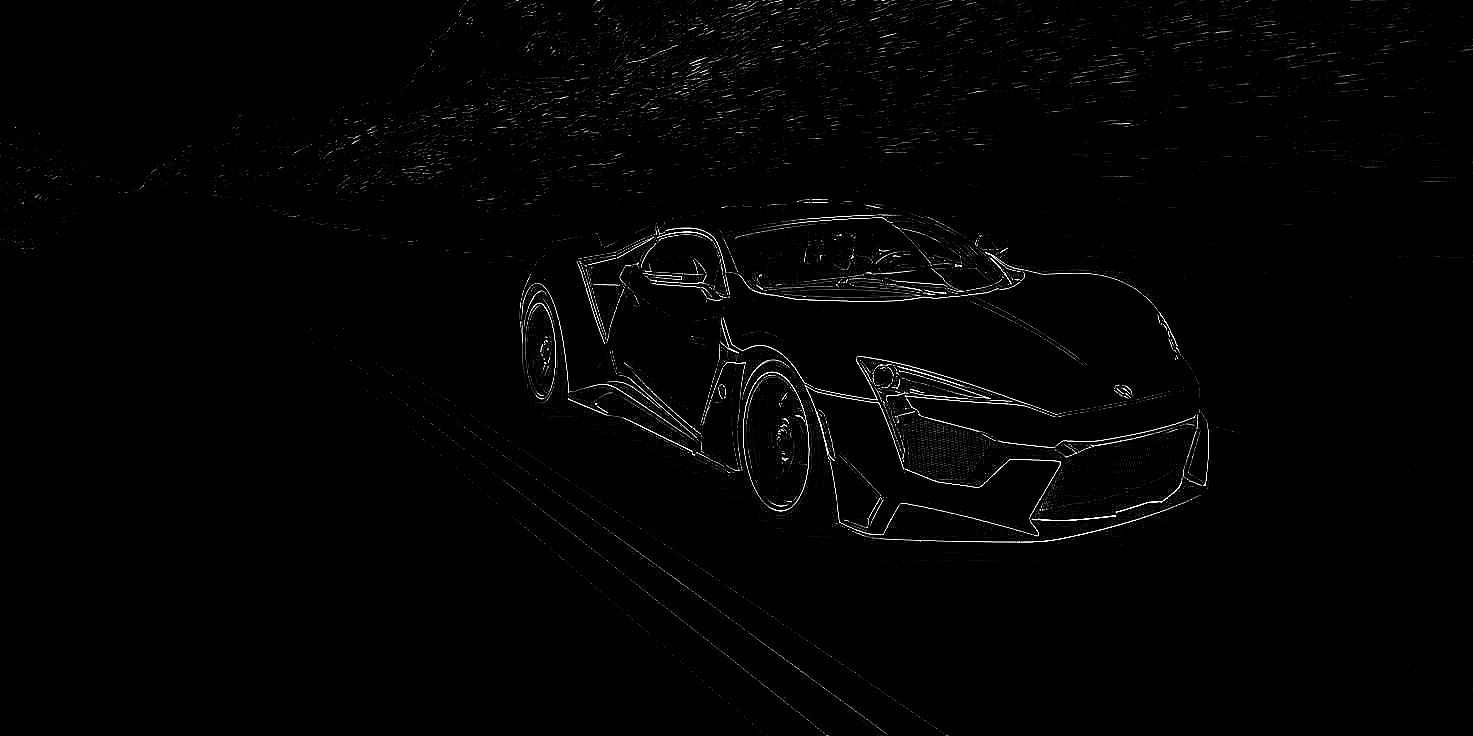

In [86]:
#edge detection kernel
kernel=np.array([[-1,-1,-1],[-1,7.5,-1],[-1,-1,-1]])
edge_detected_img=cv2.filter2D(grayscale_img,-1,kernel)
cv2_imshow(edge_detected_img)

2)Illustration of  "Fourier Transform" to decompose an image into its sine and cosine components and Apply the following filters in frequency domain
i	Ideal Low Pass Filter
iiIdeal High Pass Filter


In [62]:
from scipy.fft import fftshift,fft2,ifft2,ifftshift
import cv2
import numpy as np
import matplotlib.pyplot as plt

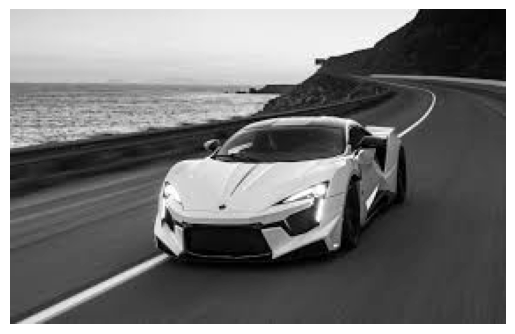

In [87]:
img_path='/content/drive/MyDrive/w motors fenyr.jpg'
f=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

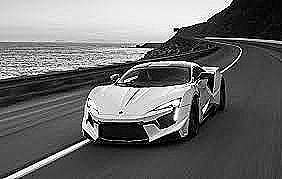

In [95]:
kernel=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpened_image=cv2.filter2D(f,-1,kernel)
cv2_imshow(sharpened_image)

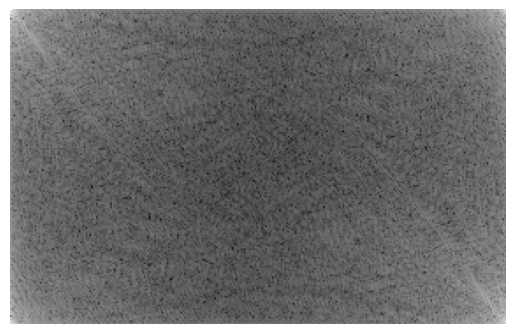

In [65]:
F=np.fft.fft2(f)
plt.imshow(np.log1p(np.abs(F)),cmap='gray')
plt.axis('off')
plt.show()

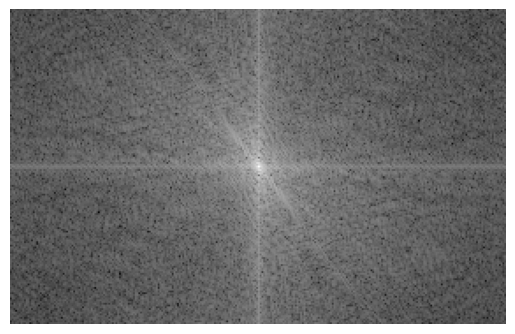

In [81]:
#Shifting the frequency domain
Fshift=np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)),cmap='gray')
plt.axis('off')
plt.show()

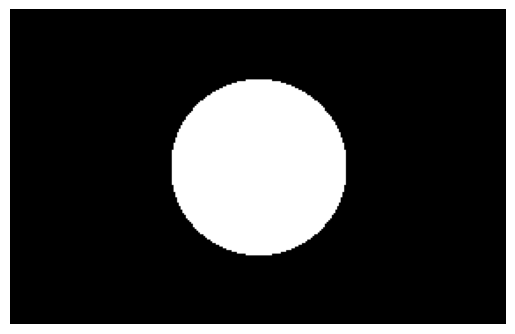

In [68]:
h_img,w_img=f.shape
H=np.zeros((h_img,w_img),dtype=np.float32)
d0=50
for u in range(h_img):
  for v in range(w_img):
     D = np.sqrt((u-h_img/2)**2 + (v-w_img/2)**2)
     if D <= d0:
      H[u,v] = 1
     else:
      H[u,v] = 0
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

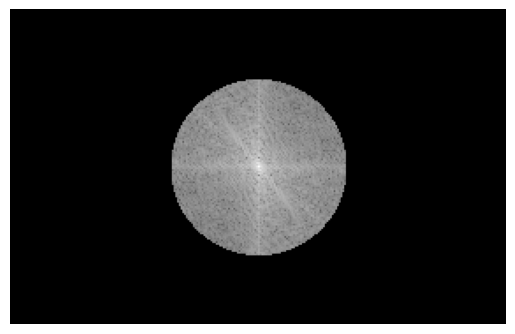

In [72]:
Gshift=Fshift*H
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')
plt.axis('off')
plt.show()

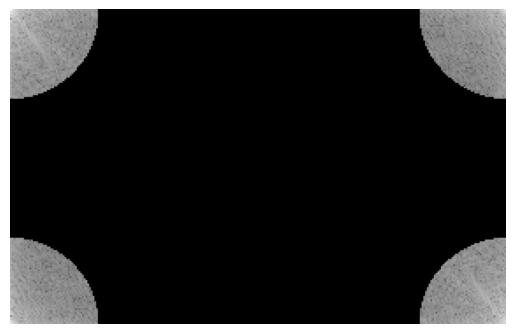

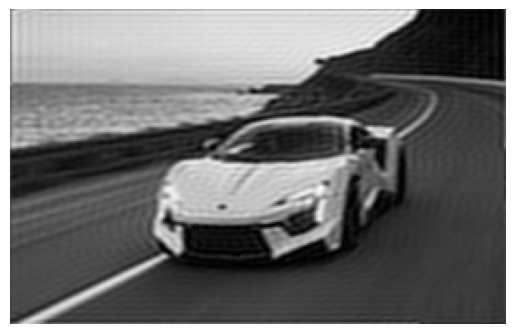

In [80]:
G=np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()


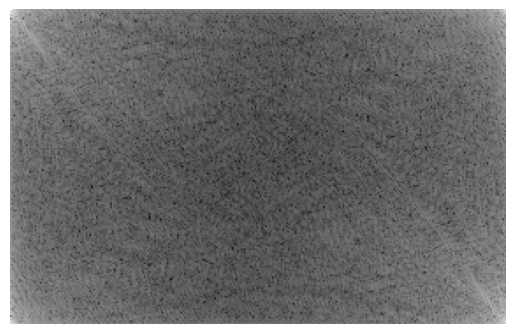

In [82]:
#high pass filter
H=1-H
F=np.fft.fft2(f)
plt.imshow(np.log1p(np.abs(F)),cmap='gray')
plt.axis('off')
plt.show()

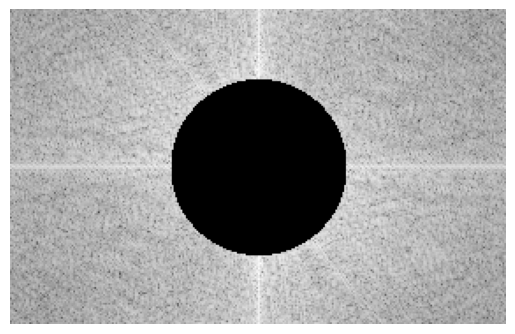

In [83]:
Gshift=Fshift*H
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')
plt.axis('off')
plt.show()

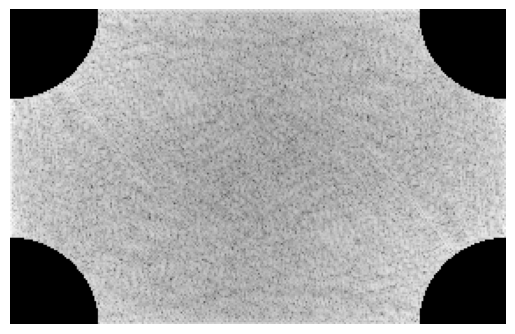

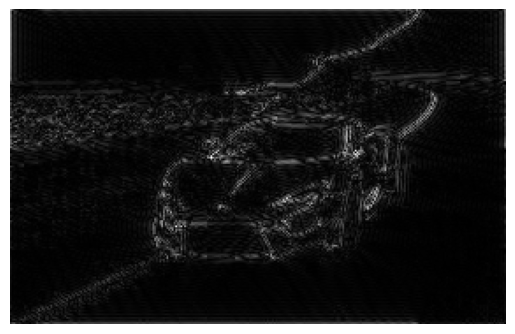

In [84]:
G=np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

Low pass filter is one of the image enhancement techniques that helps in smoothning the image by shifting low frequency to the center
whereas High pass filtering enables in sharpening the image such as to detect the pattern or any edges by shifting the higher frequency to the center and the lower frequency towards the edges

In [97]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image and read it in grayscale
img = cv2.imread('/content/drive/MyDrive/w motors fenyr.jpg', 0)


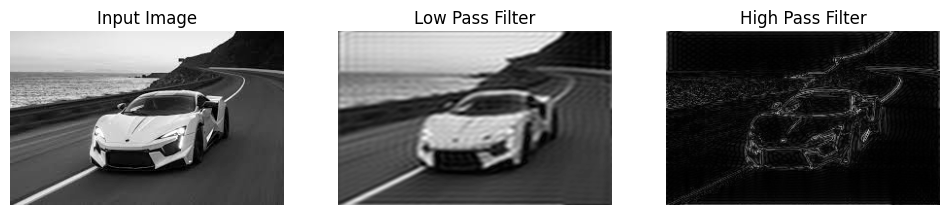

In [98]:
# Perform Fourier Transform
f_transform = np.fft.fft2(img)
f_shift = np.fft.fftshift(f_transform)

# Ideal Low Pass Filter
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
d = 30  # Cut-off frequency
mask_low = np.zeros((rows, cols), np.uint8)
mask_low[crow - d:crow + d, ccol - d:ccol + d] = 1
f_shift_low = f_shift * mask_low
image_low_pass = np.abs(np.fft.ifft2(np.fft.ifftshift(f_shift_low)))

# Ideal High Pass Filter
mask_high = 1 - mask_low
f_shift_high = f_shift * mask_high
image_high_pass = np.abs(np.fft.ifft2(np.fft.ifftshift(f_shift_high)))

# Display the results
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Input Image'), plt.axis('off')
plt.subplot(132), plt.imshow(image_low_pass, cmap='gray'), plt.title('Low Pass Filter'), plt.axis('off')
plt.subplot(133), plt.imshow(image_high_pass, cmap='gray'), plt.title('High Pass Filter'), plt.axis('off')
plt.show()
